In [13]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

In [14]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *


In [15]:
PATH = 'data/'
sz = 224

In [16]:
#list of directories in PATH
os.listdir(PATH)

['models', 'tmp', 'train', 'valid']

In [74]:
len(os.listdir(f'{PATH}valid'))

64

In [19]:
# architecture used
arch = resnet34

In [20]:
#Read in images and their labels given as sub-folder names
data = ImageClassifierData.from_paths(PATH, bs = 32, tfms=tfms_from_model(arch,sz))
learn = ConvLearner.pretrained(arch, data, precompute = True)
lrf = learn.lr_find()

C:\Users\Xyrion\fastai\Fruit-Images-Dataset\fastai\initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)
C:\Users\Xyrion\fastai\Fruit-Images-Dataset\fastai\initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


100%|████████████████████████████████████████████████████████████████████████████████| 334/334 [04:45<00:00,  1.17it/s]


 75%|███████████████████████████████████████████████████▉                 | 746/991 [00:11<00:03, 63.82it/s, loss=1.32]

In [95]:
data.c


64

In [92]:
data.classes[:5]

['Apple Braeburn',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith']

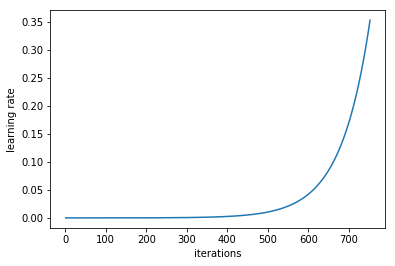

 75%|███████████████████████████████████████████████████▉                 | 746/991 [00:30<00:09, 24.86it/s, loss=1.32]

In [21]:
learn.sched.plot_lr()

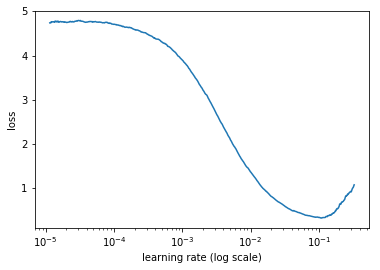

In [22]:
learn.sched.plot()

In [32]:
tfms = tfms_from_model(arch, sz, aug_tfms = transforms_side_on, max_zoom = 1.1)
data = ImageClassifierData.from_paths(PATH, bs = 32, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute = True)

C:\Users\Xyrion\fastai\Fruit-Images-Dataset\fastai\initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)
C:\Users\Xyrion\fastai\Fruit-Images-Dataset\fastai\initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [33]:
learn.fit(1e-2, 2)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.06851    0.08313    0.975791  
    1      0.042575   0.085293   0.974195                                                                              


[0.08529331810067001, 0.9741953645491226]

In [34]:
learn.precompute=False

In [35]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.070302   0.070117   0.978324  
    1      0.048357   0.059604   0.980201                                                                              
    2      0.045933   0.061044   0.980107                                                                              


[0.061044034361000345, 0.9801069719433236]

In [36]:
learn.unfreeze()

In [37]:
lr=np.array([1e-4, 1e-3, 1e-2])

In [40]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.030436   0.027473   0.986769  
    1      0.023759   0.021483   0.988177                                                                              
    2      0.019111   0.024088   0.986488                                                                              
    3      0.013535   0.032211   0.985174                                                                              
    4      0.016376   0.02956    0.986019                                                                              
    5      0.014438   0.029791   0.986112                                                                              
    6      0.024017   0.028256   0.986582                                                                              


[0.02825606270870908, 0.9865815895655438]

In [83]:
log_preds,y = learn.TTA()

probs = np.mean(np.exp(log_preds),0)

In [84]:
log_preds.shape

(5, 10657, 64)

In [106]:
log_preds[:,0,:]

array([[  0.     , -28.72992, -27.11802, -22.37079, -21.59912, -18.56176, -16.8378 , -21.92229, -23.86133,
        -24.94987, -22.89697, -24.1794 , -20.7904 , -25.57325, -26.43024, -26.11264, -28.9763 , -29.54387,
        -23.37668, -20.85531, -20.2766 , -24.08308, -29.01223, -24.92705, -25.49179, -17.67915, -21.95648,
        -27.07367, -25.92242, -19.15953, -21.90143, -24.09582, -23.73257, -27.52353, -22.97841, -17.7851 ,
        -26.48496, -23.098  , -18.43575, -26.92629, -25.88166, -17.53321, -24.49822, -18.53227, -16.19956,
        -18.81584, -18.00251, -24.75854, -22.13673, -29.77035, -25.02615, -30.51449, -25.39621, -28.47956,
        -21.19618, -26.76622, -19.42952, -26.07658, -27.8795 , -27.03837, -25.09905, -20.35866, -21.87005,
        -21.18845],
       [ -0.     , -24.71117, -22.57582, -18.45366, -17.65513, -15.71387, -13.30158, -18.77717, -20.84363,
        -23.40711, -17.77121, -22.83515, -19.15257, -23.09524, -22.44376, -23.39862, -25.56389, -26.637  ,
        -21.42807

In [75]:
probs.shape

(10657, 64)

In [73]:
y.shape

(10657,)

In [107]:
preds = np.argmax(np.mean(log_preds, 0)

In [109]:
preds.shape

(10657, 64)

In [54]:
accuracy_np(probs, y)

0.9879891151355916

In [108]:
#Define a function which return 4 distincts numbers (here means examples) from one mask
def rand_by_mask(mask,n_ex): return np.random.choice(np.where(mask)[0], n_ex, replace=False)

In [56]:
#This function use previous function and return 4 exemples corresponding correct classfication(correct or wrong)
def rand_by_correct(is_correct, n_ex): return rand_by_mask((preds == data.val_y)==is_correct, n_ex)

In [57]:
#define a plot function
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [58]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [59]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

In [60]:
def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [62]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True,10),"Correctly classified")

C:\Users\Xyrion\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  


ValueError: a must be non-empty

In [63]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False,10), "Incorrectly classified")

C:\Users\Xyrion\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  


ValueError: Cannot take a larger sample than population when 'replace=False'

In [64]:
def most_by_mask(mask, mult,n_ex):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:n_ex]]

In [65]:
def most_by_correct(y, is_correct, n_ex):
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult, n_ex)

In [66]:
plot_val_with_title(most_by_correct(0, True,10), "Most correct cats")

C:\Users\Xyrion\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


Most correct cats


<Figure size 1152x576 with 0 Axes>

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

ValueError: Found input variables with inconsistent numbers of samples: [10657, 5]

In [ ]:
plot_confusion_matrix(cm, data.classes)

In [71]:
preds.shape

(5, 64)

In [82]:
y.shape

(10657,)